In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:/Users/USER/Desktop/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Make ‘PassengerId’ as the index column

In [6]:
data = pd.read_csv('C:/Users/USER/Desktop/titanic_dataset.csv',index_col='PassengerId')

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2 Basic details of dataset

In [8]:
data.shape

(891, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 3 Checking null values of data

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### 4 Fill in all missing values present in all columns

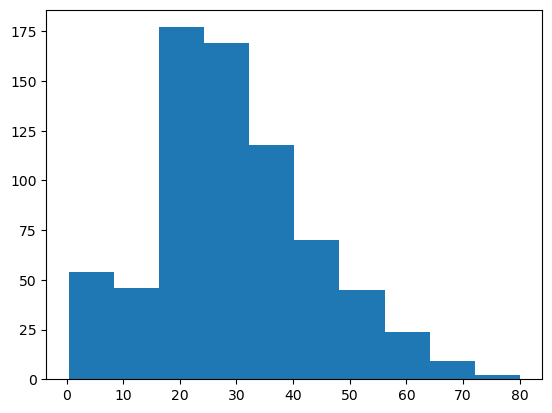

In [12]:
plt.hist(data['Age'])
plt.show()

In [13]:
data['Age'] =data['Age'].fillna(data['Age'].median())

In [14]:
data['Age'].isna().sum()

0

In [15]:
Cabin_mode = data['Cabin'].mode()[0]
Embarked_mode = data['Embarked'].mode()[0]

In [16]:
Cabin_mode

'B96 B98'

In [17]:
Embarked_mode

'S'

In [18]:
data['Cabin']=data['Cabin'].fillna(Cabin_mode)

In [19]:
data['Embarked']=data['Embarked'].fillna(Embarked_mode)

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### 5 Check and handle outliers in atleast 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of Age column')

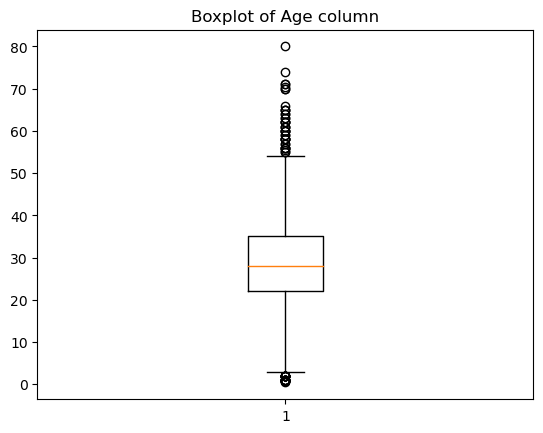

In [21]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')

In [22]:
Q1 = np.percentile(data['Age'], 25,interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50,interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75,interpolation='midpoint')

In [23]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [24]:
IQR = Q3-Q1

In [25]:
print(IQR)

13.0


In [26]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [27]:
print(low_limit)
print(up_limit)

2.5
54.5


In [28]:
outlier =[]
for x in data['Age']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [29]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [30]:
ind2 = data['Age']>up_limit

In [31]:
data.loc[ind2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [32]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [33]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S


Text(0.5, 1.0, 'Boxplot of Fare column')

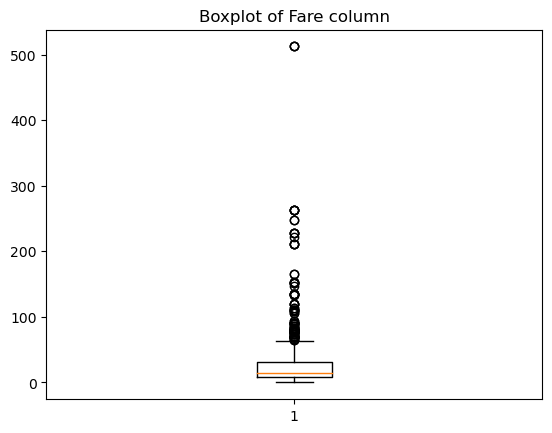

In [34]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')

In [35]:
Q1 = np.percentile(data['Fare'], 25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75,interpolation='midpoint')

In [36]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [37]:
print(IQR)

13.0


In [38]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [39]:
print(low_limit)
print(up_limit)

-11.604199999999999
50.0


In [40]:
outlier =[]
for x in data['Fare']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [41]:
outlier

[71.2833,
 53.1,
 51.8625,
 263.0,
 146.5208,
 82.1708,
 52.0,
 76.7292,
 80.0,
 83.475,
 73.5,
 56.4958,
 263.0,
 61.175,
 63.3583,
 77.2875,
 52.0,
 247.5208,
 73.5,
 77.2875,
 53.1,
 79.2,
 66.6,
 61.3792,
 69.55,
 55.0,
 56.4958,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 52.5542,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 55.0,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 211.5,
 227.525,
 52.0,
 73.5,
 120.0,
 113.275,
 90.0,
 55.9,
 120.0,
 81.8583,
 89.1042,
 51.8625,
 52.0,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 51.4792,
 55.9,
 110.8833,
 79.65,
 78.2667,
 56.9292,
 153.4625,
 65.0,
 52.5542,
 77.9583,
 69.3,
 56.4958,
 76.7292,
 73.5,
 133.65,
 73.5,
 52.0,
 52.0,
 5

In [42]:
ind3 = data['Fare']>up_limit

In [43]:
data.loc[ind3].index

Int64Index([  2,   4,   7,  28,  32,  35,  36,  53,  62,  63,
            ...
            821, 827, 836, 839, 847, 850, 857, 864, 868, 872],
           dtype='int64', name='PassengerId', length=149)

In [44]:
data.drop([2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864] , inplace=True)

SyntaxError: invalid syntax (2185870698.py, line 3)

Text(0.5, 1.0, 'Boxplot of SibSp column')

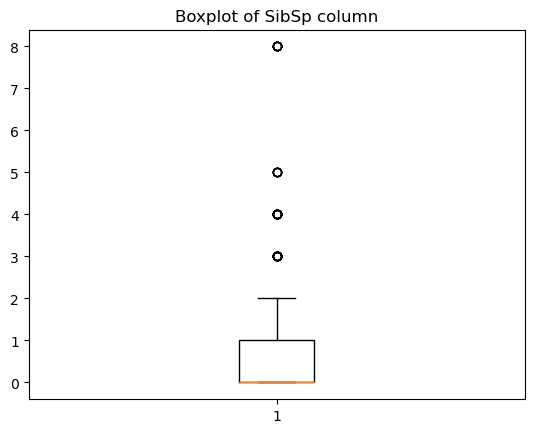

In [45]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')

In [46]:
Q1 = np.percentile(data['SibSp'], 25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75,interpolation='midpoint')

In [47]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [48]:
IQR = Q3-Q1

In [49]:
print(IQR)

1.0


In [50]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [51]:
print(low_limit)
print(up_limit)

-1.5
2.5


In [52]:
outlier =[]
for x in data['SibSp']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [53]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [54]:
ind4 = data['SibSp']>up_limit

In [55]:
data.loc[ind4].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [56]:
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [57]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [102]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  803 non-null    int64  
 1   Pclass    803 non-null    int64  
 2   Name      803 non-null    object 
 3   Sex       803 non-null    object 
 4   Age       803 non-null    float64
 5   SibSp     803 non-null    int64  
 6   Parch     803 non-null    int64  
 7   Ticket    803 non-null    object 
 8   Fare      803 non-null    float64
 9   Cabin     803 non-null    object 
 10  Embarked  803 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 75.3+ KB


####  Encoding categorical column

In [121]:
data['Name'].nunique()

803

In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [123]:
data['Name'] = label_enc.fit_transform(data['Name'])

In [112]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,172,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,321,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,248,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,15,male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,503,male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,273,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,380,female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [128]:
data['Sex'].nunique()

2

In [129]:
data['Sex'] = label_enc.fit_transform(data['Sex'])

In [130]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,172,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,321,0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,248,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,15,1,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,503,1,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,273,0,19.0,0,0,112053,30.0000,B42,S
889,0,3,380,0,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [131]:
data['Ticket'].nunique()

645

In [132]:
data['Ticket'] = label_enc.fit_transform(data['Ticket'])

In [133]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,1,22.0,1,0,493,7.2500,B96 B98,S
2,1,1,172,0,38.0,1,0,563,71.2833,C85,C
3,1,3,321,0,26.0,0,0,633,7.9250,B96 B98,S
4,1,1,248,0,35.0,1,0,41,53.1000,C123,S
5,0,3,15,1,35.0,0,0,446,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,503,1,27.0,0,0,86,13.0000,B96 B98,S
888,1,1,273,0,19.0,0,0,12,30.0000,B42,S
889,0,3,380,0,28.0,1,2,639,23.4500,B96 B98,S


In [134]:
data['Cabin'].nunique()

127

In [135]:
data['Cabin'] = label_enc.fit_transform(data['Cabin'])

In [136]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,1,22.0,1,0,493,7.2500,38,S
2,1,1,172,0,38.0,1,0,563,71.2833,68,C
3,1,3,321,0,26.0,0,0,633,7.9250,38,S
4,1,1,248,0,35.0,1,0,41,53.1000,45,S
5,0,3,15,1,35.0,0,0,446,8.0500,38,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,503,1,27.0,0,0,86,13.0000,38,S
888,1,1,273,0,19.0,0,0,12,30.0000,22,S
889,0,3,380,0,28.0,1,2,639,23.4500,38,S


In [138]:
data['Embarked'].nunique()

3

In [139]:
data['Embarked'] = label_enc.fit_transform(data['Embarked'])

In [140]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,1,22.0,1,0,493,7.2500,38,2
2,1,1,172,0,38.0,1,0,563,71.2833,68,0
3,1,3,321,0,26.0,0,0,633,7.9250,38,2
4,1,1,248,0,35.0,1,0,41,53.1000,45,2
5,0,3,15,1,35.0,0,0,446,8.0500,38,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,503,1,27.0,0,0,86,13.0000,38,2
888,1,1,273,0,19.0,0,0,12,30.0000,22,2
889,0,3,380,0,28.0,1,2,639,23.4500,38,2


#### Splitting data in to train and test

In [141]:
y= data['Survived']
x= data.drop('Survived',axis=1)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

####  KNN model

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
metric_k =[]
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model1 = knn.fit(x_train,y_train)
    y_pred_knn = model1.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [146]:
metric_k

[0.6766169154228856,
 0.6716417910447762,
 0.7164179104477612,
 0.6666666666666666,
 0.6965174129353234,
 0.6965174129353234,
 0.7263681592039801,
 0.7014925373134329,
 0.7064676616915423,
 0.6915422885572139,
 0.6666666666666666,
 0.6716417910447762]

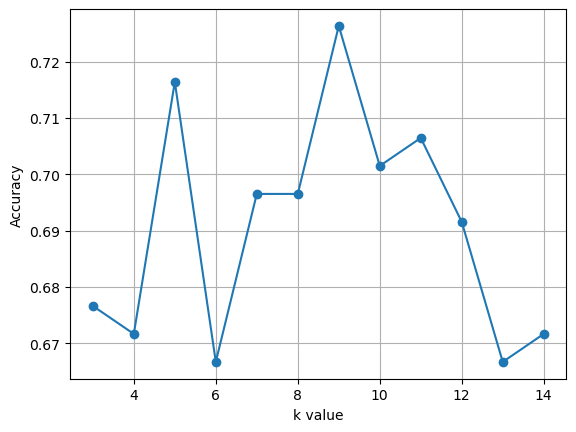

In [147]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [148]:
knn = KNeighborsClassifier(n_neighbors=7)
model1 = knn.fit(x_train,y_train)
y_pred_knn = model1.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [149]:
print(confusion_matrix(y_test,y_pred_knn))

[[102  16]
 [ 45  38]]


In [150]:
print(accuracy_score(y_test,y_pred_knn))

0.6965174129353234


####  SVM model

In [151]:
from sklearn.svm import SVC

In [152]:
svm_clf = SVC(kernel ='rbf')

In [153]:
svm_model = svm_clf.fit(x_train,y_train)

In [154]:
y_pred1 =svm_clf.predict(x_test)

In [155]:
confusion_matrix(y_test,y_pred1)

array([[112,   6],
       [ 54,  29]], dtype=int64)

In [156]:
accuracy_score(y_test,y_pred1)

0.7014925373134329

####  K Fold Cross Validation

In [157]:
from sklearn.model_selection import KFold

In [158]:
kfold_validator=KFold(10)

In [186]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [187]:
from sklearn.model_selection import cross_val_score

In [191]:
cv_result_knn = cross_val_score(model1,x,y,cv = kfold_validator)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [192]:
cv_result_knn

array([0.55555556, 0.62962963, 0.65432099, 0.65      , 0.6       ,
       0.6875    , 0.675     , 0.6375    , 0.7       , 0.7       ])

In [193]:
np.mean(cv_result_knn)

0.6489506172839506

In [196]:
cv_result_svm = cross_val_score(svm_model,x,y,cv = kfold_validator)

In [197]:
cv_result_svm

array([0.59259259, 0.67901235, 0.67901235, 0.6125    , 0.6       ,
       0.675     , 0.6875    , 0.7125    , 0.7375    , 0.725     ])

In [198]:
np.mean(cv_result_svm)

0.6700617283950616

#### Stratified Cross Vlidation

In [199]:
from sklearn.model_selection import StratifiedKFold

In [200]:
skfold_validator=StratifiedKFold(n_splits=10)

In [201]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 69  71  80  81  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [202]:
skcv_result_knn = cross_val_score(model1,x,y,cv = skfold_validator)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [203]:
skcv_result_knn

array([0.58024691, 0.59259259, 0.69135802, 0.675     , 0.6125    ,
       0.675     , 0.675     , 0.625     , 0.7       , 0.7       ])

In [208]:
np.mean(skcv_result_knn)

0.6526697530864198

In [205]:
skcv_result_svm = cross_val_score(svm_model,x,y,cv = skfold_validator)

In [206]:
skcv_result_svm

array([0.62962963, 0.60493827, 0.7037037 , 0.65      , 0.65      ,
       0.6625    , 0.675     , 0.7375    , 0.725     , 0.7125    ])

In [209]:
np.mean(skcv_result_svm)

0.6750771604938273